In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [126]:
data_url = "https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/auto-mpg.csv"

cars = sns.load_dataset("mpg")
cars


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [127]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [128]:
# Create a cross tabulation
pd.crosstab(index = cars['origin'], columns = 'count').sort_values('count', ascending=False)

col_0,count
origin,
usa,249
japan,79
europe,70


In [129]:
# To make a two way frequency table, we just pass a column to the function
pd.crosstab(index = cars['origin'], columns = cars['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [130]:
cars.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


<Axes: xlabel='origin', ylabel='mpg'>

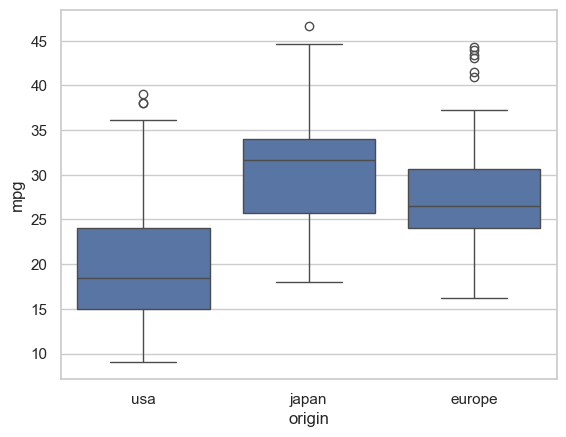

In [131]:
sns.boxplot(x = 'origin', y = 'mpg', data = cars)

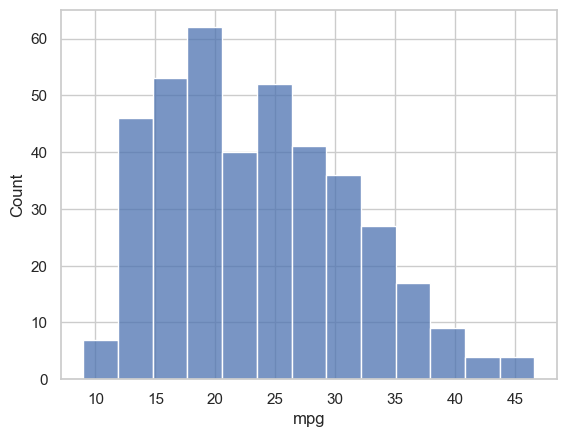

In [132]:
sns.histplot(x = 'mpg', data = cars);

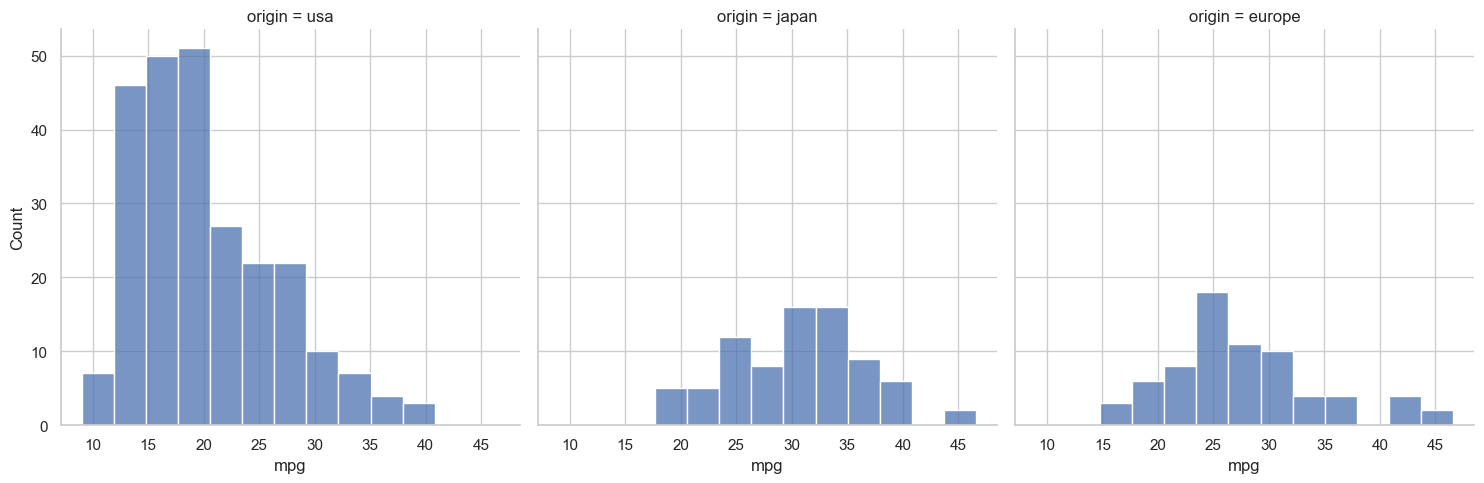

In [133]:
# Make a faceted plot of the histograms by origin
sns.displot(data = cars, x = 'mpg', col = "origin")

In [134]:
# Let's test if there is a statistically meaningful difference in mpg between european and usa cars
cars_usa = cars[cars['origin'] == "usa"]
cars_euro = cars[cars['origin'] == "europe"]
#cars.value_counts("origin")

In [135]:
# Assuming we have independent samples, we can use the ttest_ind() from scipy.stats to to a t-test
result = stats.ttest_ind(cars_usa['mpg'], cars_euro['mpg'], nan_policy='omit')

print(f"T-statistic: {result.statistic:.3f}")
print(f"P-value: {result.pvalue:.4f}")

T-statistic: -8.915
P-value: 0.0000


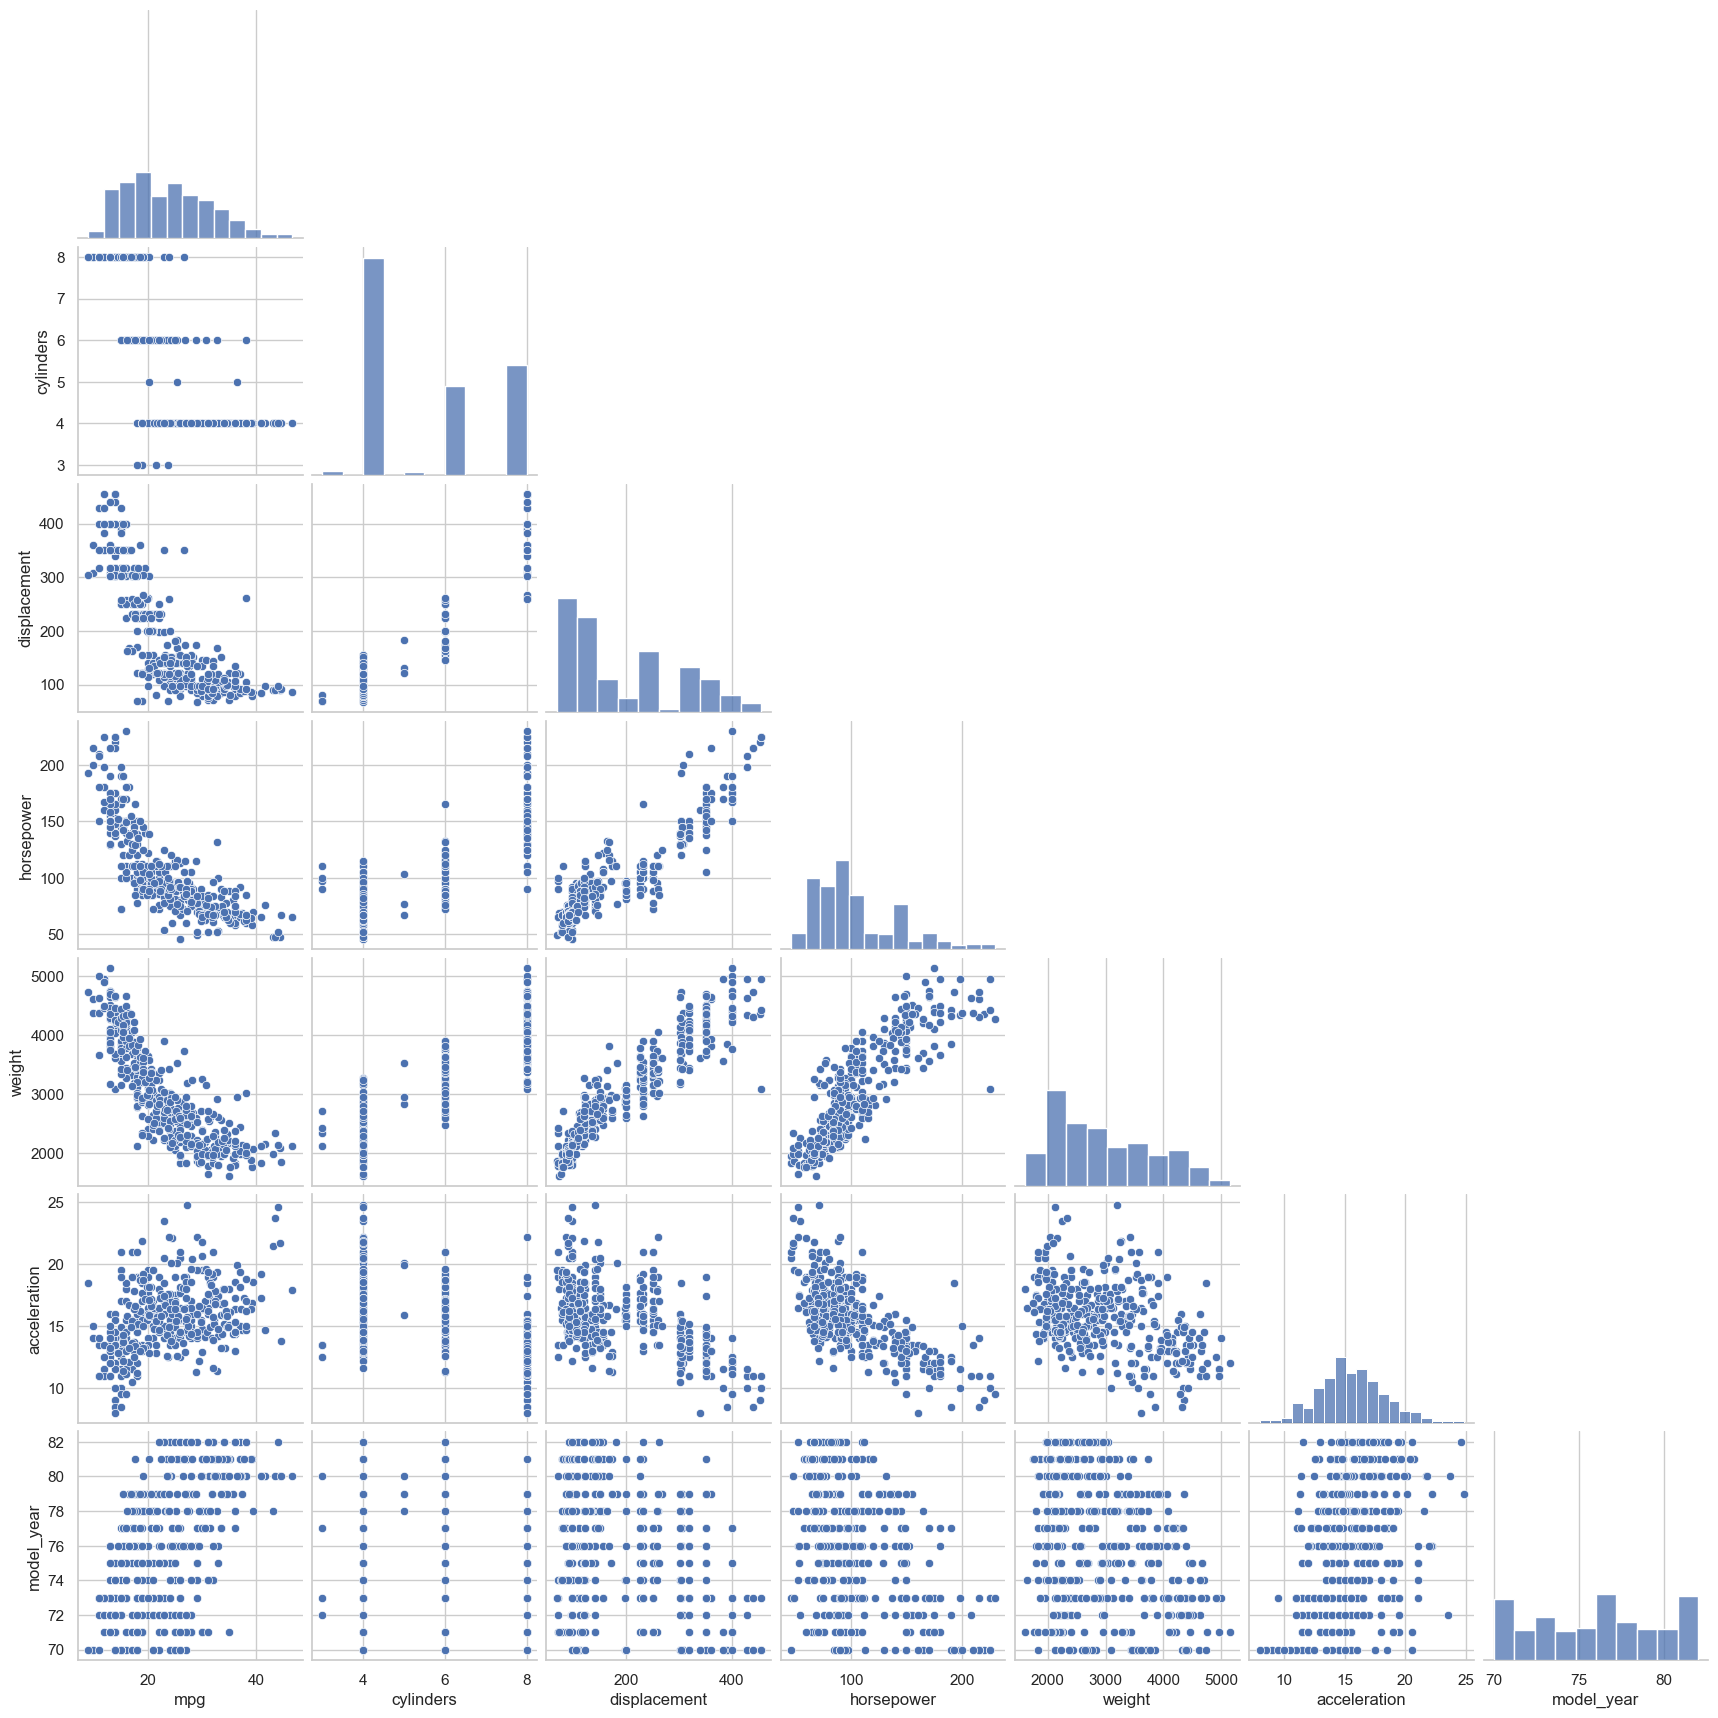

In [136]:
sns.pairplot(data = cars, corner = True)

In [137]:
# Lets create linear regression to predict mpg
ols_result = stats.linregress(x = cars['weight'], y = cars['mpg'])

print(f"slope: {ols_result.slope:.3f}")
print(f"intercept: {ols_result.intercept:.4f}")
print(f"corr_coef: {ols_result.rvalue:.4f}")
print(f"P-value: {ols_result.pvalue:.4f}")
print(ols_result)

slope: -0.008
intercept: 46.3174
corr_coef: -0.8317
P-value: 0.0000
LinregressResult(slope=np.float64(-0.007676610063926469), intercept=np.float64(46.31736442026564), rvalue=np.float64(-0.831740933244335), pvalue=np.float64(2.9727995640501e-103), stderr=np.float64(0.0002574868628078231), intercept_stderr=np.float64(0.7952452295111826))


In [138]:
# Now, set up a ML model
# This will split up the data using a 75/25 split
X_train, X_test, y_train, y_test = model_selection.train_test_split(cars[['weight']], cars[['mpg']], random_state=42)

In [139]:
y_train.shape

(298, 1)

In [140]:
y_test.shape

(100, 1)

In [141]:
# Now, let's fit the model
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)


LinearRegression()

In [142]:
# Now, make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred[:5]

array([[32.78350963],
       [26.29284424],
       [26.22246353],
       [16.00944064],
       [13.68687724]])

In [143]:
# To see our coefficients of our model
regr.coef_

array([[-0.00782008]])

In [144]:
# Check our metrics
metrics.r2_score(y_test, y_pred)

0.7277224617744513

In [145]:
metrics.mean_squared_error(y_test, y_pred)

15.460875948271058

### Correlation Exploration

In [146]:
cars.select_dtypes(include='number').corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [147]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

for cmap in plt.colormaps():
    print(cmap)




magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
berlin
managua
vanimo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
grey
gist_grey
gist_yerg
Grays
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
berlin_r
managua_r
vanimo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_

Text(0.5, 1.0, 'Correlation between continuous variables in the cars dataset')

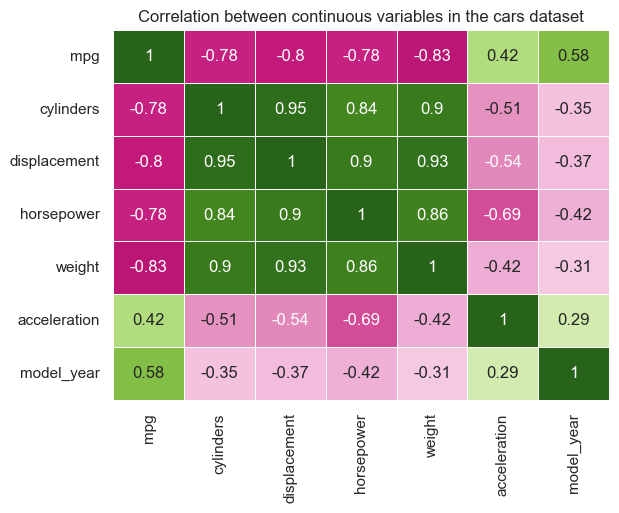

In [148]:
fig, ax = plt.subplots()
sns.heatmap(data = cars.select_dtypes(include='number').corr(),
            annot = True,
            cmap = 'PiYG',
            center = 0,
            linewidths = 0.5,
            cbar = False)

ax.set_title("Correlation between continuous variables in the cars dataset")

In [149]:
# Now, let's build a data frame of the correlations and calculate the p-values using the scipy.stats.pearsonr
from scipy.stats import pearsonr

# Filter numeric columns and grab names
cars_numeric = cars.select_dtypes(include='number')
cols = cars_numeric.columns

# Compute correlation and p-values
corr_results = []

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        # Compute the Pearson correlation and p-value, removing NaNs
        corr, pval = pearsonr(cars_numeric[col1], cars_numeric[col2], )
        # Store the result in a dictionary
        corr_results.append({'var1': col1, 'var2': col2, 'corr': corr, 'pval': pval})

# Convert to DataFrame
corr_df = pd.DataFrame(corr_results).dropna()
corr_df


,var1,var2,corr,pval
0,mpg,cylinders,-0.775396,4.503992e-81
1,mpg,displacement,-0.804203,1.655889e-91
3,mpg,weight,-0.831741,2.972800e-103
4,mpg,acceleration,0.420289,1.823092e-18
5,mpg,model_year,0.579267,4.844936e-37
6,cylinders,displacement,0.950721,1.696995e-203
8,cylinders,weight,0.896017,1.051234e-141
9,cylinders,acceleration,-0.505419,3.397499e-27
10,cylinders,model_year,-0.348746,7.971195e-13
12,displacement,weight,0.932824,1.222226e-177


/Users/tim/Documents/Github/python_viz/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


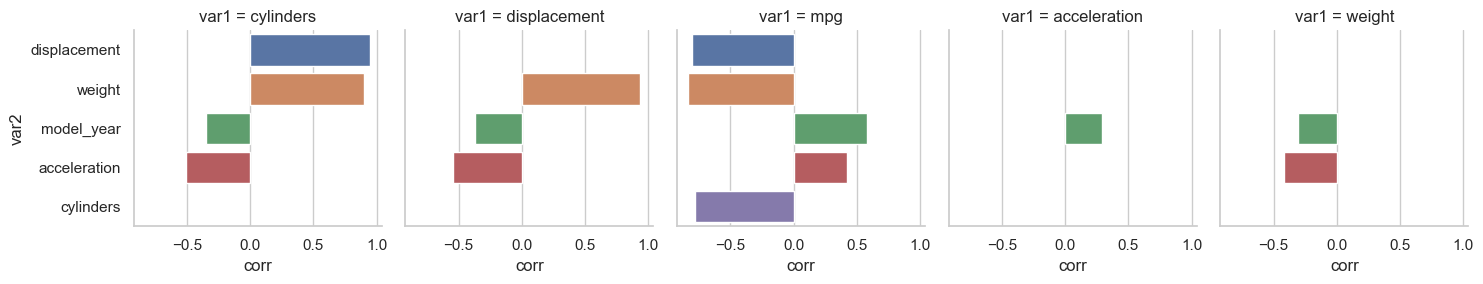

In [150]:
sns.set_theme(style = "whitegrid")

# sns.PairGrid(data = corr_df.sort_values("corr", ascending=False),
#     x_vars = corr, 
#     y_vars = corr_df["var1"] + corr_df["var2"]
#     )

g = sns.FacetGrid(data = corr_df.sort_values("corr", ascending=False),
              col = "var1", hue = "var2")

g.map(sns.barplot, "corr", "var2")



# sns.scatterplot(data = corr_df.sort_values("corr", ascending=False),  
#                 x = "corr",
#                 y = "pval",
#                 hue = "var1")

### Logistic Regression
Predict binary outcomes